In [262]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopy
from glob import glob
from geopy.geocoders import Nominatim

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


from sklearn import set_config

set_config(display='diagram')

In [263]:
path = r'C:\Users\Amash\Projects\Strive\Exercises\Module_4_Feature_Engineering\Week_2\D1_06. Geoposition_Enc\data'

In [264]:
files = glob(path + '\*.csv')

In [265]:
files

['C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_2\\D1_06. Geoposition_Enc\\data\\items.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_2\\D1_06. Geoposition_Enc\\data\\items_translated.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_2\\D1_06. Geoposition_Enc\\data\\item_categories.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_2\\D1_06. Geoposition_Enc\\data\\item_categories_translated.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_2\\D1_06. Geoposition_Enc\\data\\sales_train.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_2\\D1_06. Geoposition_Enc\\data\\sample_submission.csv',
 'C:\\Users\\Amash\\Projects\\Strive\\Exercises\\Module_4_Feature_Engineering\\Week_2\\D1_06. Geoposition_Enc\\data\\shops.csv',
 'C:\\Users\\Amash\\Projects\\Strive\

In [266]:
dfs = []
for file in files:
    df_name = file[105:-4]
    dfs.append(df_name)
    vars()[file[105:-4]] = pd.read_csv(file)

In [267]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [269]:
shops_translated.sort_values(by='shop_name_translated')

,shop_id,shop_name_translated
2,2,"Adygea Shopping Center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
56,56,"Chekhov SEC ""Carnival"""
16,16,"Colosseum ""Rio"""
55,55,Digital warehouse 1C-Online
15,15,"Kaluga TRC ""XXI Century"""
13,13,"Kazan TC ""Behetle"""
14,14,"Kazan TC ""ParkHaus"" II"
54,54,"Khimki ТЦ ""Mega"""
18,18,"Krasnoyarsk Shopping center ""June"""


### Repeated Shops

* Ids of repepeated shop 1: 11 and 10
* Ids of repepeated shop 2: 57 and 0
* Ids of repepeated shop 3: 41 and 40
* Ids of repepeated shop 4: 23 and 24 

In [270]:
shops.sort_values(by='shop_name')

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [321]:
shops_translated['is_online'] = shops_translated.shop_name_translated.apply(lambda x: 1 if ('online' in x.lower())  else 0)

In [322]:
shops_translated

,shop_id,shop_name_translated,is_online,City,lat,long
0,0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,62.027287,129.732086
1,1,"Yakutsk TC ""Central"" franc",0,Yakutsk,62.027287,129.732086
2,2,"Adygea Shopping Center ""Mega""",0,Adygea,44.693901,40.152042
3,3,"Balashikha TRK ""October-Kinomir""",0,Balashikha,55.803623,37.964649
4,4,"Volzhsky shopping center ""Volga Mall""",0,Volzhsky,48.782102,44.777984
5,5,"Vologda Shopping and Entertainment Center ""Mar...",0,Vologda,59.218876,39.893276
6,6,"Voronezh (Plekhanovskaya, 13)",0,Voronezh,51.660598,39.200586
7,7,"Voronezh TRC ""Maksimir""",0,Voronezh,51.660598,39.200586
8,8,"Voronezh TRC City-Park ""Grad""",0,Voronezh,51.660598,39.200586
9,9,Outbound Trade,0,Outbound,52.695374,-2.752734


In [272]:
shops_translated['City'] = shops_translated['shop_name_translated'].str.extract(r'(\w+)')

In [319]:
shops_translated['City'] = shops_translated['shop_name_translated'].str.split(' ').str[0]

In [273]:
shops['City'] =  shops['shop_name'].str.split(' ').str[0]

In [317]:
shops

,shop_name,shop_id,City,lat,long
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,62.027287,129.732086
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,62.027287,129.732086
2,"Адыгея ТЦ ""Мега""",2,Адыгея,44.693901,40.152042
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,55.803623,37.964649
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,48.782102,44.777984
5,"Вологда ТРЦ ""Мармелад""",5,Вологда,59.218876,39.893276
6,"Воронеж (Плехановская, 13)",6,Воронеж,51.660598,39.200586
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж,51.660598,39.200586
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж,51.660598,39.200586
9,Выездная Торговля,9,Выездная,42.826839,71.483600


In [275]:
shops['lat'] = shops['City'].apply(lambda x: geolocator.geocode(x).latitude if geolocator.geocode(x) else None )

shops['long'] = shops['City'].apply(lambda x: geolocator.geocode(x).longitude if geolocator.geocode(x) else None )

In [276]:
shops_translated['lat'] = shops_translated['City'].apply(lambda x: geolocator.geocode(x).latitude if geolocator.geocode(x) else None )

shops_translated['long'] = shops_translated['City'].apply(lambda x: geolocator.geocode(x).longitude if geolocator.geocode(x) else None )

In [277]:
shops.dropna(inplace=True)
shops_translated.dropna(inplace=True)

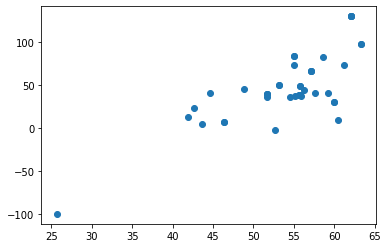

In [278]:
plt.scatter(x=shops_translated['lat'], y=shops_translated['long'])
plt.show()

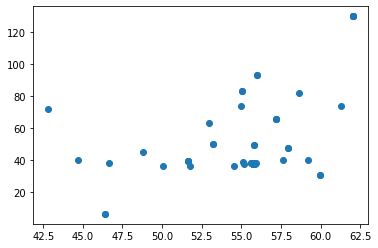

In [279]:
plt.scatter(x=shops['lat'], y=shops['long'])
plt.show()

In [161]:
geometry = [Point(xy) for xy in zip(shops['long'], shops['lat'])]
gdf = GeoDataFrame(shops_translated, geometry=geometry)   

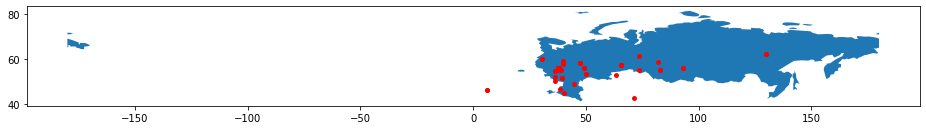

In [239]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf2.plot(ax=world[world.name == 'Russia'].plot(figsize=(16, 22)), marker='o', color='red', markersize=15);

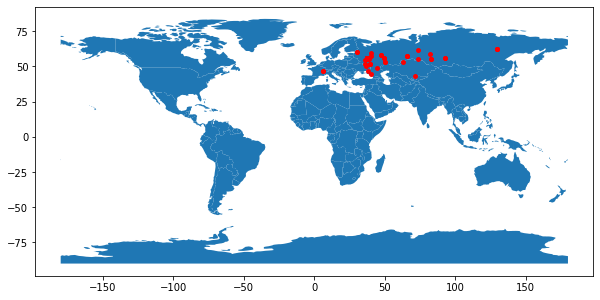

In [230]:
gdf1.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

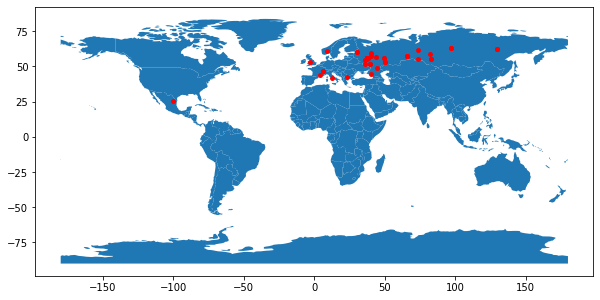

In [162]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
geolocator = Nominatim(user_agent="http")


In [286]:
locations = [(xyz) for xyz in zip(shops['lat'], shops['long'], shops_translated['shop_name_translated'])]


In [309]:
import folium

russia = folium.Map([geolocator.geocode('Russia').latitude, geolocator.geocode('Russia').longitude], tiles='Stamen Toner')
tooltip = "Click me!"
#mapit = folium.Map()
for lat, lon, city in locations:
    folium.Marker( location=[ lat, lon], fill_color='#43d9de', radius=8, popup=city,  tooltip=tooltip ).add_to(russia)

#mapit.save( 'map.html')

In [310]:
russia

In [311]:
folium.TileLayer('openstreetmap').add_to(russia)
#folium.TileLayer('cartodbpositron').add_to(russia)
folium.TileLayer('stamenwatercolor').add_to(russia)
#folium.TileLayer('cartodbdark_matter').add_to(russia)
folium.LayerControl().add_to(russia)

In [312]:
russia

In [323]:
russia.save('russian_shops.html')